In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pd.set_option('display.max_columns', 200)

In [159]:
train_csv = "I:/Jacob/Documents/PlantTraits2024/data/train.csv"
test_csv = "I:/Jacob/Documents/PlantTraits2024/data/test.csv"

train_data = pd.read_csv(train_csv)
test_csv = pd.read_csv(test_csv)

In [141]:
all_without_id = [col for col in train_data.columns if col != 'id']
num_duplicates = train_data[all_without_id].duplicated().sum()
print("Liczba zduplikowanych wierszy:", num_duplicates)

Liczba zduplikowanych wierszy: 4200


In [60]:
display(train_data.head())
display(test_csv.head())

id  WORLDCLIM_BIO1_annual_mean_temperature  \
0  192027691                               12.235703   
1  195542235                               17.270555   
2  196639184                               14.254504   
3  195728812                               18.680834   
4  195251545                                0.673204   

   WORLDCLIM_BIO12_annual_precipitation  \
0                            374.466675   
1                             90.239998   
2                            902.071411   
3                           1473.933350   
4                            530.088867   

   WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  \
0                                          62.524445                       
1                                          10.351111                       
2                                          49.642857                       
3                                         163.100006                       
4                                          50.857777                       

   WORLDCLIM_BIO15_precipitation_seasonality  \
0                                  72.256844   
1                                  38.220940   
2                                  17.873655   
3                                  45.009758   
4                                  38.230709   

   WORLDCLIM_BIO4_temperature_seasonality  \
0                              773.592041   
1                              859.193298   
2                              387.977753   
3                              381.053986   
4                             1323.526855   

   WORLDCLIM_BIO7_temperature_annual_range  SOIL_bdod_0.5cm_mean_0.01_deg  \
0                                33.277779                            125   
1                                40.009777                            124   
2                                22.807142                            107   
3                                20.436666                            120   
4                                45.891998                             91   

   SOIL_bdod_100.200cm_mean_0.01_deg  SOIL_bdod_15.30cm_mean_0.01_deg  \
0                                149                              136   
1                                144                              138   
2                                133                              119   
3                                131                              125   
4                                146                              120   

   SOIL_bdod_30.60cm_mean_0.01_deg  SOIL_bdod_5.15cm_mean_0.01_deg  \
0                              145                             132   
1                              143                             128   
2                              126                             114   
3                              131                             123   
4                              138                             109   

   SOIL_bdod_60.100cm_mean_0.01_deg  SOIL_cec_0.5cm_mean_0.01_deg  \
0                               148                           228   
1                               142                           145   
2                               132                           283   
3                               131                           234   
4                               143                           381   

   SOIL_cec_100.200cm_mean_0.01_deg  SOIL_cec_15.30cm_mean_0.01_deg  \
0                               210                             221   
1                               139                             149   
2                               254                             252   
3                               220                             223   
4                               325                             352   

   SOIL_cec_30.60cm_mean_0.01_deg  SOIL_cec_5.15cm_mean_0.01_deg  \
0                             212                            222   
1                             145                            153   
2                           

id  WORLDCLIM_BIO1_annual_mean_temperature  \
0  201238668                                8.086756   
1  202310319                               10.844286   
2  202604412                                8.105556   
3  201353439                                7.077679   
4  195351745                                4.790555   

   WORLDCLIM_BIO12_annual_precipitation  \
0                           2246.500000   
1                            495.871429   
2                            378.328583   
3                            878.785706   
4                           2299.366699   

   WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  \
0                                         127.321426                       
1                                          28.023809                       
2                                          39.928570                       
3                                          70.428574                       
4                                         150.199997                       

   WORLDCLIM_BIO15_precipitation_seasonality  \
0                                  20.423418   
1                                  18.738306   
2                                  41.885647   
3                                  37.045235   
4                                  24.136568   

   WORLDCLIM_BIO4_temperature_seasonality  \
0                              353.381042   
1                              786.554382   
2                              722.071167   
3                              669.389343   
4                              462.887695   

   WORLDCLIM_BIO7_temperature_annual_range  SOIL_bdod_0.5cm_mean_0.01_deg  \
0                                17.535713                             80   
1                                29.292856                            130   
2                                34.853809                            133   
3                                25.150000                            103   
4                                22.516666                             85   

   SOIL_bdod_100.200cm_mean_0.01_deg  SOIL_bdod_15.30cm_mean_0.01_deg  \
0                                109                               90   
1                                155                              142   
2                                134                              139   
3                                140                              116   
4                                114                               98   

   SOIL_bdod_30.60cm_mean_0.01_deg  SOIL_bdod_5.15cm_mean_0.01_deg  \
0                               96                              83   
1                              146                             138   
2                              134                             135   
3                              129                             111   
4                              108                              93   

   SOIL_bdod_60.100cm_mean_0.01_deg  SOIL_cec_0.5cm_mean_0.01_deg  \
0                               106                           378   
1                               152                           273   
2                               135                           203   
3                               138                           302   
4                               112                           372   

   SOIL_cec_100.200cm_mean_0.01_deg  SOIL_cec_15.30cm_mean_0.01_deg  \
0                               258                             310   
1                               246                             275   
2                               232                             220   
3                               190                             222   
4                               242                             317   

   SOIL_cec_30.60cm_mean_0.01_deg  SOIL_cec_5.15cm_mean_0.01_deg  \
0                             289                            343   
1                             273                            286   
2                           

## Porównanie TEST z TRAIN
Zauważamy, że train ma 176 kolumn, podczas gdy test 164

In [10]:
train_columns = set(train_data.columns)
test_columns = set(test_csv.columns)

only_in_train = train_columns - test_columns

print("Kolumny tylko w train: ", only_in_train)

Kolumny tylko w train:  {'X26_mean', 'X11_sd', 'X4_mean', 'X11_mean', 'X18_sd', 'X26_sd', 'X50_mean', 'X4_sd', 'X3112_sd', 'X50_sd', 'X3112_mean', 'X18_mean'}


Te kolumny to są nasze zmienne zależne, które musimy przewidzieć.

## Wyodrębnienie MODIS i VOD

In [160]:
modis_vod_cols = [col for col in train_data.columns if col.startswith("MODIS_") or col.startswith("VOD_")]

df_modis_vod = train_data[modis_vod_cols].copy()

# Szybki podgląd
df_modis_vod.head()

MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1  \
0                                                543                     
1                                                837                     
2                                                953                     
3                                                565                     
4                                               3137                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1  \
0                                                943                     
1                                                920                     
2                                               3236                     
3                                               3225                     
4                                               3253                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1  \
0                                                429                     
1                                                527                     
2                                                519                     
3                                                296                     
4                                               3727                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1  \
0                                                568                     
1                                                710                     
2                                                885                     
3                                                661                     
4                                               3386                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1  \
0                                               1199                     
1                                                977                     
2                                               3682                     
3                                               3379                     
4                                               2286                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m10  \
0                                                657                      
1                                               1111                      
2                                                501                      
3                                                617                      
4                                                838                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10  \
0                                               1088                      
1                                               1218                      
2                                               4240                      
3                                               2934                      
4                                               1678                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10  \
0                                                438                      
1                                                708                      
2                                                294                      
3                                                321                      
4                                                598                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m10  \
0                                                618                      
1                                                941                      
2                                                736                      
3                                                648                      
4                                                7

### Podstawowe statystyki

In [13]:
df_modis_vod.shape

(55489, 96)

In [14]:
df_modis_vod.describe()

MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1  \
count                                       55489.000000                     
mean                                         1498.789111                     
std                                          1712.024960                     
min                                            67.000000                     
25%                                           513.000000                     
50%                                           822.000000                     
75%                                          1643.000000                     
max                                         13283.000000                     

       MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1  \
count                                       55489.000000                     
mean                                         2886.715926                     
std                                          1277.223200                     
min                                            85.000000                     
25%                                          2123.000000                     
50%                                          2616.000000                     
75%                                          3228.000000                     
max                                         12900.000000                     

       MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1  \
count                                       55489.000000                     
mean                                         1182.061129                     
std                                          1705.980379                     
min                                             1.000000                     
25%                                           296.000000                     
50%                                           452.000000                     
75%                                           997.000000                     
max                                         12127.000000                     

       MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1  \
count                                       55489.000000                     
mean                                         1446.036890                     
std                                          1682.498083                     
min                                            97.000000                     
25%                                           569.000000                     
50%                                           770.000000                     
75%                                          1355.000000                     
max                                         12981.000000                     

       MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1  \
count                                       55489.000000                     
mean                                         2701.092865                     
std                                           689.774946                     
min                                            45.000000                     
25%                                          2262.000000                     
50%                                          2685.000000                     
75%                                          3128.000000                     
max                                          7285.000000                     

       MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m10  \
count                                       55489.000000                      
mean                                          863.161618                      
std                                           643.095896                      
min                                            94.000000                      
25%                                           457.000000                      
50%               

In [84]:
df_modis_vod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55489 entries, 0 to 55488
Data columns (total 96 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1   55489 non-null  int64  
 1   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1   55489 non-null  int64  
 2   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1   55489 non-null  int64  
 3   MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1   55489 non-null  int64  
 4   MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1   55489 non-null  int64  
 5   MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m10  55489 non-null  int64  
 6   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10  55489 non-null  int64  


In [17]:
df_modis_vod.isnull().sum()

MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1    0
MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1    0
MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1    0
MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1    0
MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1    0
                                                                      ..
VOD_X_1997_2018_multiyear_mean_m08                                     0
VOD_X_1997_2018_multiyear_mean_m09                                     0
VOD_X_1997_2018_multiyear_mean_m10                                     0
VOD_X_1997_2018_multiyear_mean_m11                                     0
VOD_X_1997_2018_multiyear_mean_m12                                     0
Length: 96, dtype: int64

In [18]:
df_modis_vod.isnull().sum().sum()

0

Nie sprawdzam liczby unikalnych wartości w kolumnie, gdyż uważam, że nie jest to istotna informacja, w kontekście wartości numerycznych.

# Duplikaty
W podzbiorze MODIS zidentyfikowano 18512 duplikatów, jednak ich usunięcie nie jest możliwe bez analizy pełnego zbioru danych. Ich obecność może być wynikiem kontekstu lub relacji z innymi danymi.

In [86]:
num_duplicates = df_modis_vod.duplicated().sum()
print("Liczba zduplikowanych wierszy:", num_duplicates)

Liczba zduplikowanych wierszy: 18512


# VOD - zawartość wody i biomasa roślin

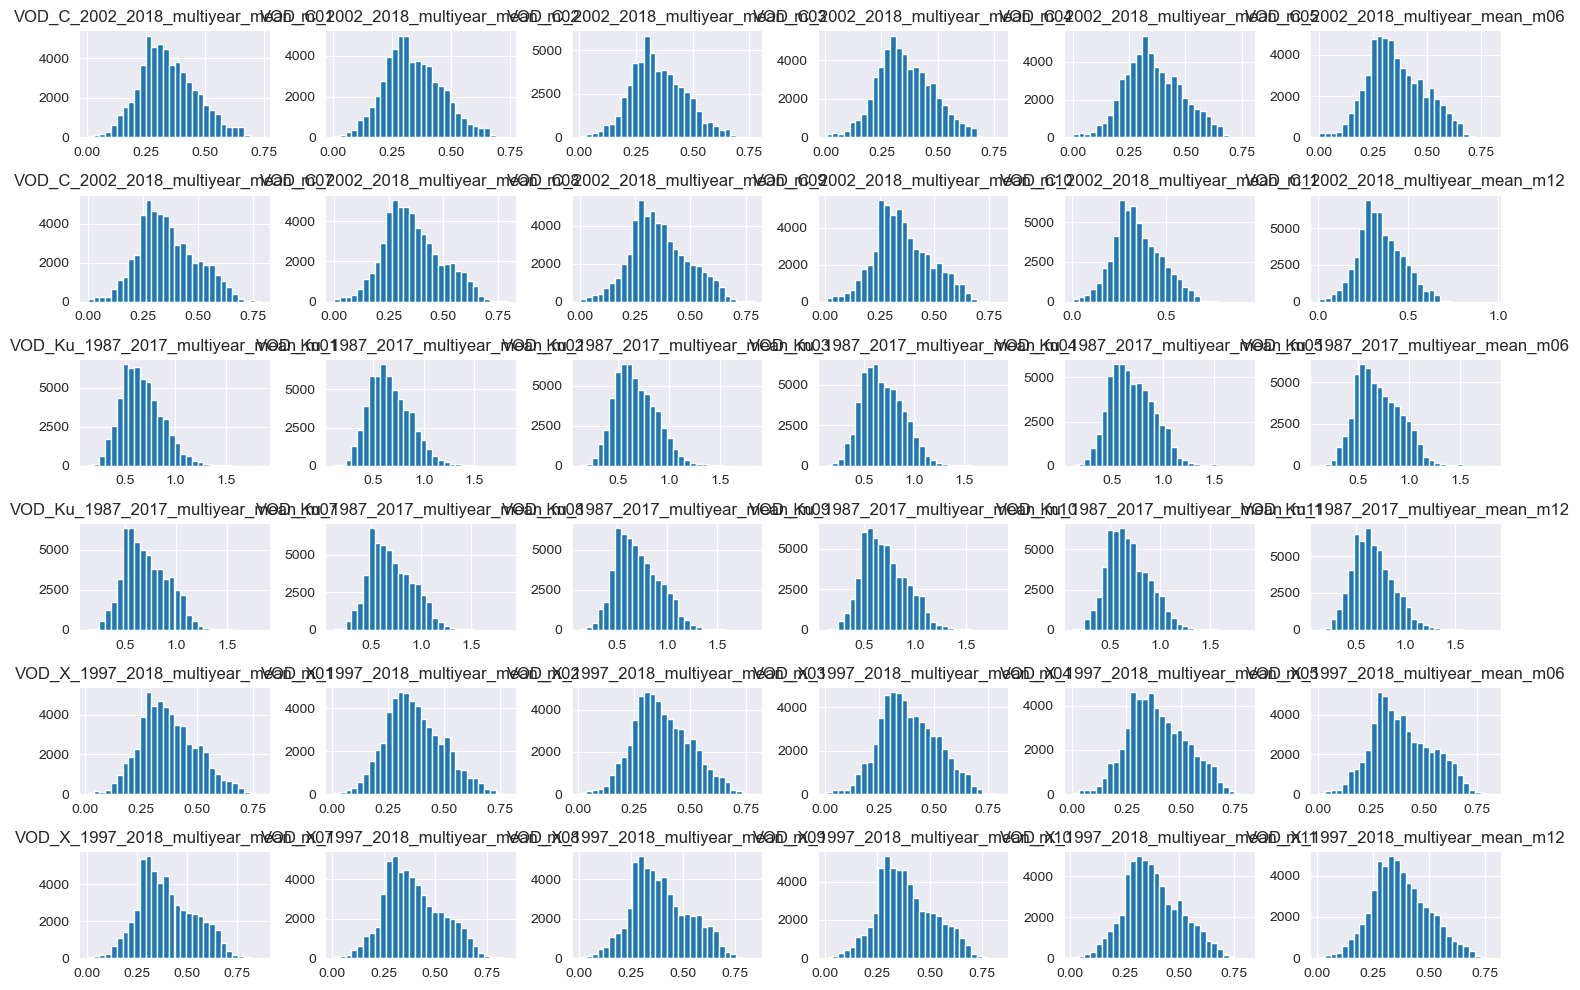

In [95]:
df_vod   = df_modis_vod[[c for c in df_modis_vod.columns if c.startswith('VOD_')]]

df_vod.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

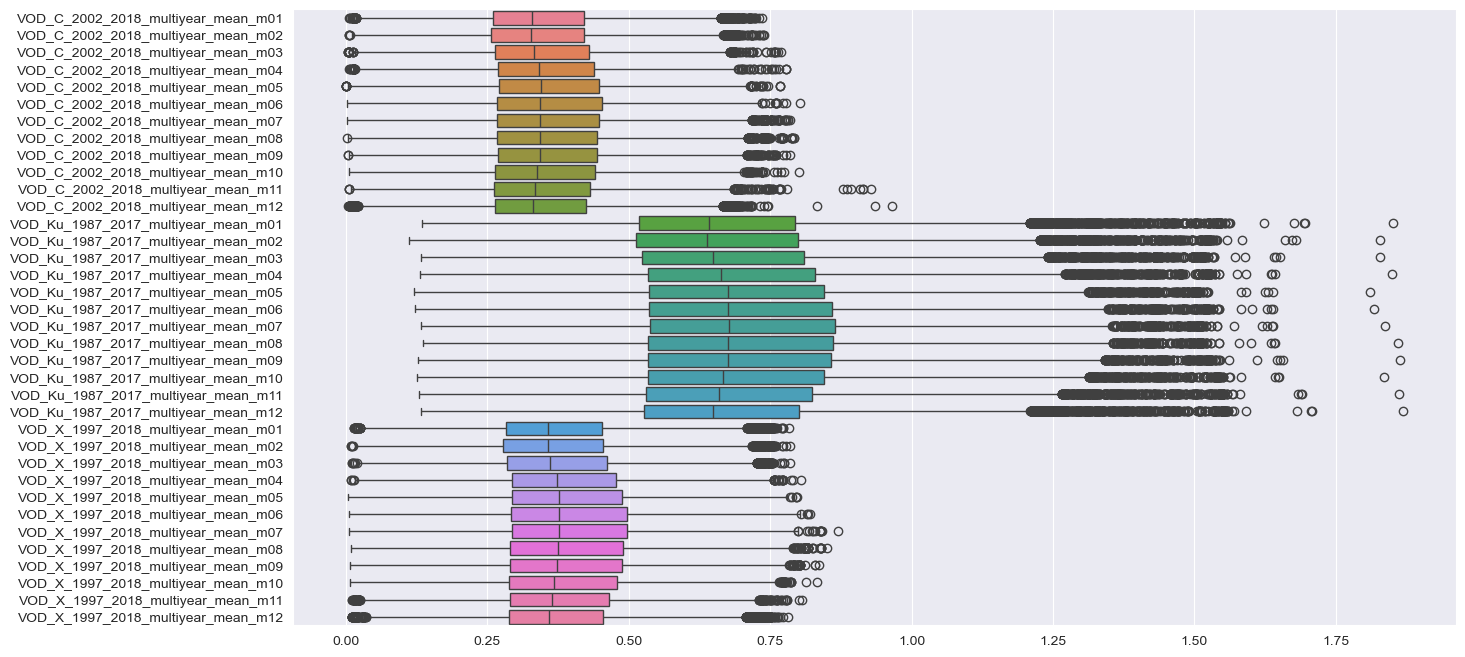

In [88]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_vod, orient='h')
plt.show()

W trakcie eksploracyjnej analizy danych (EDA) zdecydowano o pozostawieniu wszystkich obserwacji w kolumnach VOD, mimo identyfikacji wartości skrajnych, takich jak minimalna (approx. 0.00069) i maksymalna (approx. 1.8689). Poniżej przedstawiono uzasadnienie tej decyzji:
1. Wartości ujemne w danych VOD byłyby błędem technicznym lub artefaktem obliczeń, co mogłoby uzasadniać ich usunięcie. Jednakże w analizowanym zbiorze danych nie występują wartości ujemne, co potwierdza poprawność danych w tym zakresie.
2. Wartości bliskie 0 w VOD mogą być reprezentatywne dla obszarów pustynnych lub innych środowisk o niskiej zawartości biomasy.
3. Wartości maksymalne, takie jak 1.86, mogą odzwierciedlać obszary o bardzo wysokiej zawartości wody w roślinności, np. wilgotne lasy tropikalne. Ich obecność może być rzeczywista i wartościowa..
4. Usuwanie wartości skrajnych powinno być uzasadnione wiedzą domenową lub techniczną wskazującą, że są one błędne. W tym przypadku nie ma dowodów sugerujących, że wartości skrajne w VOD są efektem błędu pomiarowego czy obliczeniowego.
5. Wartości skrajne mogą zostać odpowiednio przekształcone lub znormalizowane na dalszym etapie analizy.

In [89]:
negative_mask = (df_vod < 0)
any_negatives = negative_mask.any().any()
print("Czy istnieją wartości ujemne w VOD?", any_negatives)
print(f"Wartość maksymalna dla kolumn VOD: {df_vod.max().max()}")
print(f"Wartość minimalna dla kolumn VOD: {df_vod.min().min()}")

Czy istnieją wartości ujemne w VOD? False
Wartość maksymalna dla kolumn VOD: 1.86889910697937
Wartość minimalna dla kolumn VOD: 0.0006905592163093


### Sprawdzenie korelacji między VOD_C i VOD X

In [20]:
vod_c_cols = [col for col in df_modis_vod.columns if col.startswith('VOD_C')]
vod_x_cols = [col for col in df_modis_vod.columns if col.startswith('VOD_X')]

corr_matrix_c_to_x = df_modis_vod[vod_c_cols + vod_x_cols].corr()

print(corr_matrix_c_to_x)

                                    VOD_C_2002_2018_multiyear_mean_m01  \
VOD_C_2002_2018_multiyear_mean_m01                            1.000000   
VOD_C_2002_2018_multiyear_mean_m02                            0.973466   
VOD_C_2002_2018_multiyear_mean_m03                            0.957417   
VOD_C_2002_2018_multiyear_mean_m04                            0.946055   
VOD_C_2002_2018_multiyear_mean_m05                            0.924404   
VOD_C_2002_2018_multiyear_mean_m06                            0.892561   
VOD_C_2002_2018_multiyear_mean_m07                            0.874884   
VOD_C_2002_2018_multiyear_mean_m08                            0.864283   
VOD_C_2002_2018_multiyear_mean_m09                            0.863661   
VOD_C_2002_2018_multiyear_mean_m10                            0.885106   
VOD_C_2002_2018_multiyear_mean_m11                            0.930691   
VOD_C_2002_2018_multiyear_mean_m12                            0.967856   
VOD_X_1997_2018_multiyear_mean_m01    

### Heatmapa w celu lepszego zobrazowania

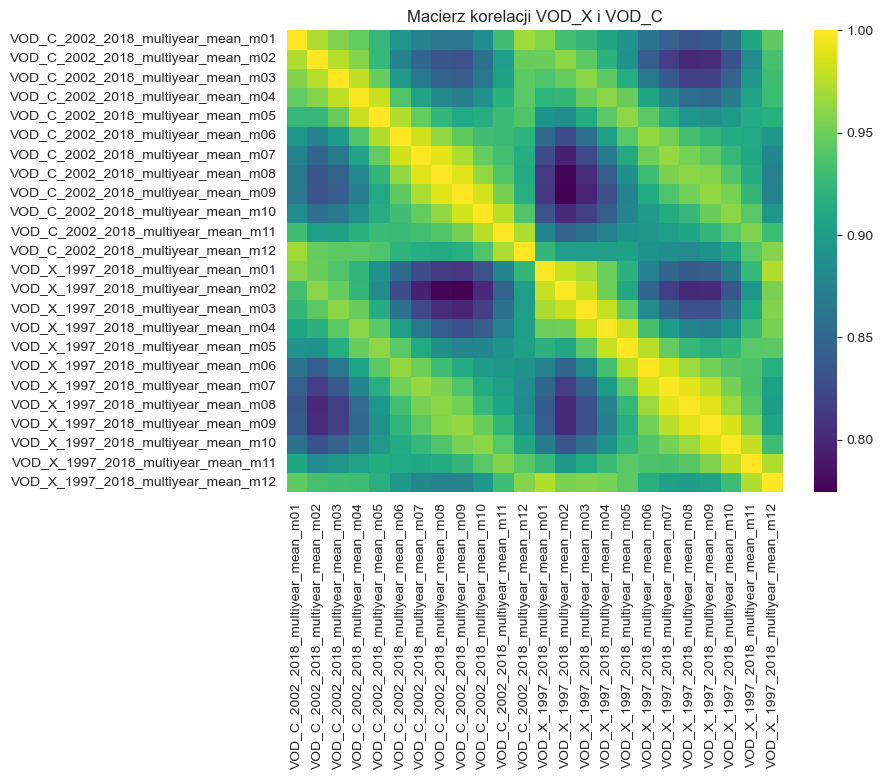

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_c_to_x, cmap='viridis')
plt.title("Macierz korelacji VOD_X i VOD_C")
plt.show()

Jak widać VOD_X jest skorelowany z VOD_C dość mocno, tak więc w późniejszym etapie scalam je w jedną aby uprościć model zachowując informacje

# Wykres liniowy dla średniej wartości VOD w kolejnych miesiącach dla każdego pasma

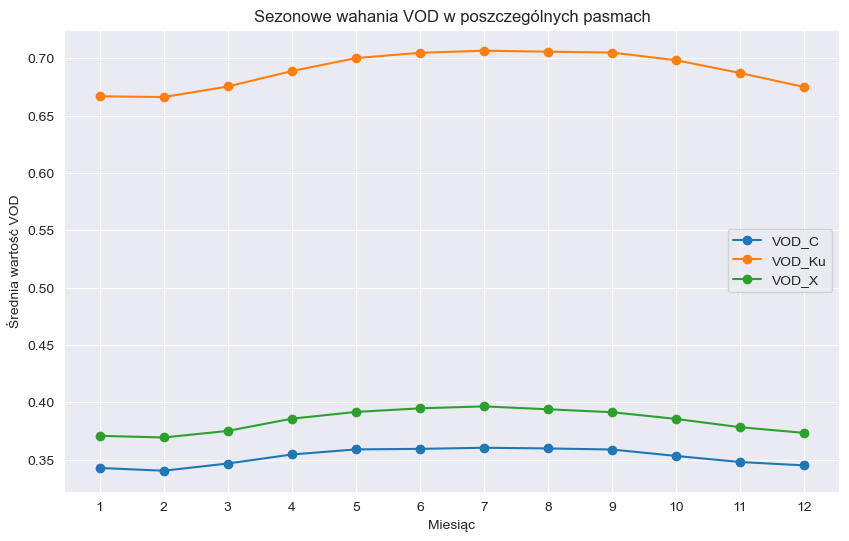

In [90]:
bands = ["VOD_C", "VOD_Ku", "VOD_X"]
months = range(1, 13)

plt.figure(figsize=(10, 6))

for band in bands:
    avg_month = []

    for m in months:
        col_suffix = f"_m{m:02d}"
        month_cols = [c for c in df_vod.columns if band in c and col_suffix in c]

        if len(month_cols) == 0:
            avg_month.append(None)
            continue

        col_data = df_vod[month_cols[0]]
        mean_val = col_data.mean(skipna=True)
        avg_month.append(mean_val)

    plt.plot(months, avg_month, marker='o', label=band)

plt.xticks(months)  # miesiące na osi X
plt.xlabel("Miesiąc")
plt.ylabel("Średnia wartość VOD")
plt.title("Sezonowe wahania VOD w poszczególnych pasmach")
plt.legend()
plt.show()


Widać, że obserwowany jest wzrost średniej VOD dla każdego pasma w cieplejszych miesiącach.

# Korelacje pomiędzy różnymi pasmami i miesiącami

In [91]:
corr = df_vod.corr()

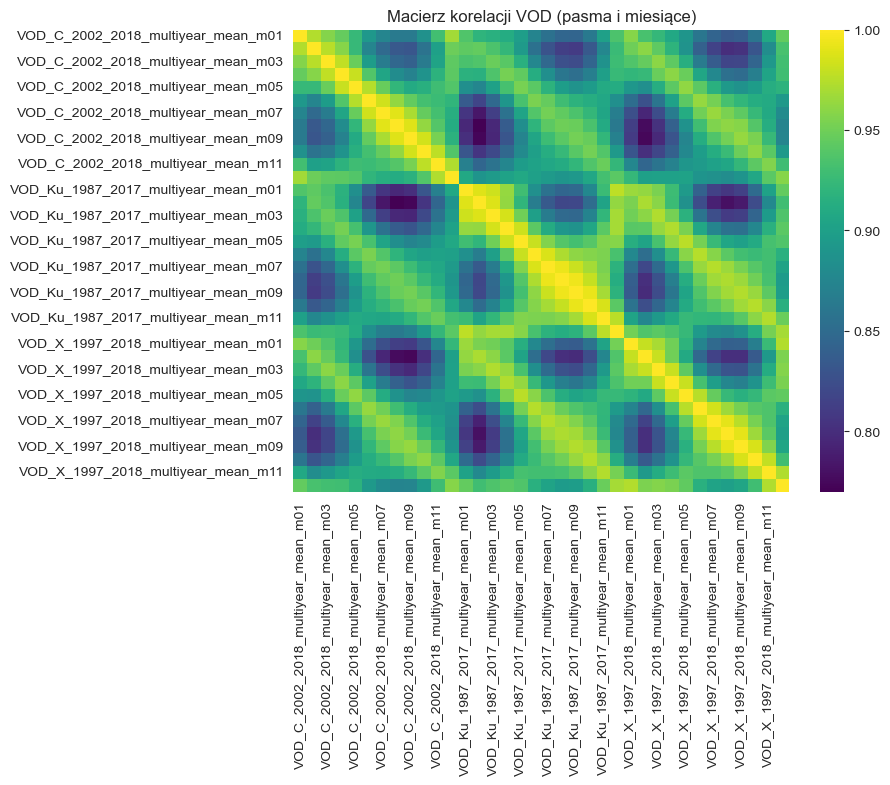

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='viridis')
plt.title("Macierz korelacji VOD (pasma i miesiące)")
plt.show()

Na podstawie "heatmapy" korelacji, można zauważyć, że mamy na wysoką korelację pomiędzy pasmami dla tych samych miesięcy. Może to oznaczać, że pasma rejestrują podobne właściwości roślinności w danym okresie.

# Porównanie ogólnego rozkładu pasm

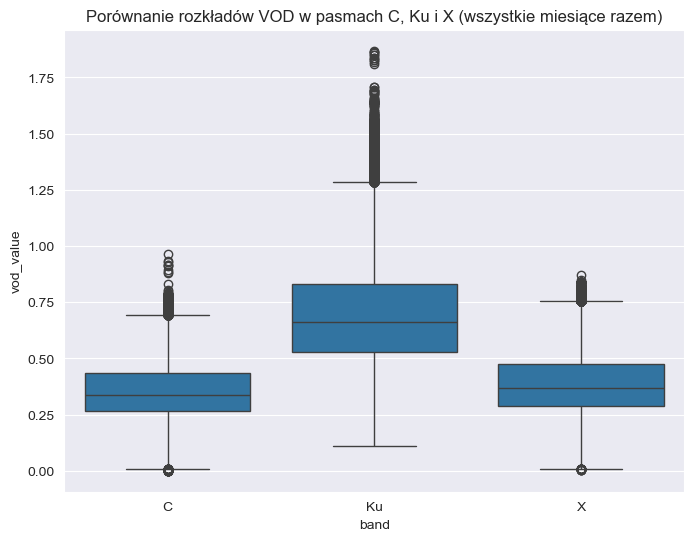

In [93]:
vod_c_cols = [c for c in df_vod.columns if c.startswith('VOD_C')]
df_vod_c = df_vod[vod_c_cols]  # DataFrame samych kolumn C
df_vod_c_melt = df_vod_c.melt(var_name="col_name", value_name="vod_value")
df_vod_c_melt["band"] = "C"

vod_ku_cols = [c for c in df_vod.columns if c.startswith('VOD_Ku')]
df_vod_ku = df_vod[vod_ku_cols]
df_vod_ku_melt = df_vod_ku.melt(var_name="col_name", value_name="vod_value")
df_vod_ku_melt["band"] = "Ku"

vod_x_cols = [c for c in df_vod.columns if c.startswith('VOD_X')]
df_vod_x = df_vod[vod_x_cols]
df_vod_x_melt = df_vod_x.melt(var_name="col_name", value_name="vod_value")
df_vod_x_melt["band"] = "X"

df_vod_bands = pd.concat([df_vod_c_melt, df_vod_ku_melt, df_vod_x_melt], ignore_index=True)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_vod_bands, x="band", y="vod_value")
plt.title("Porównanie rozkładów VOD w pasmach C, Ku i X (wszystkie miesiące razem)")
plt.show()

Dla pasma C i X widzimy bardzo zbliżony rozkład wartości VOD, co może sugerować podobne charakterystyki rejestrowanych danych w tych zakresach częstotliwości. Natomiast pasmo Ku (12–18 GHz) znacząco różni się swoim rozkładem, co można zauważyć przez większą rozpiętość wartości oraz większą liczbę wartości wychodzących poza tzw. zakres międzykwartylowy (IQR). W szczególności w paśmie Ku obserwujemy znacznie więcej wartości odstających, które mogą reprezentować ekstremalne warunki środowiskowe (np. tropikalne lasy o bardzo wysokiej wilgotności lub pustynne obszary o minimalnym poziomie wilgotności).

# MODIS - dane odbica światła słonecznego
Mamy bardzo dużo kolumn, dlatego pokazywanie histogramów w formie jak dla VOD było by nieczytelne. Poniżej boxplot

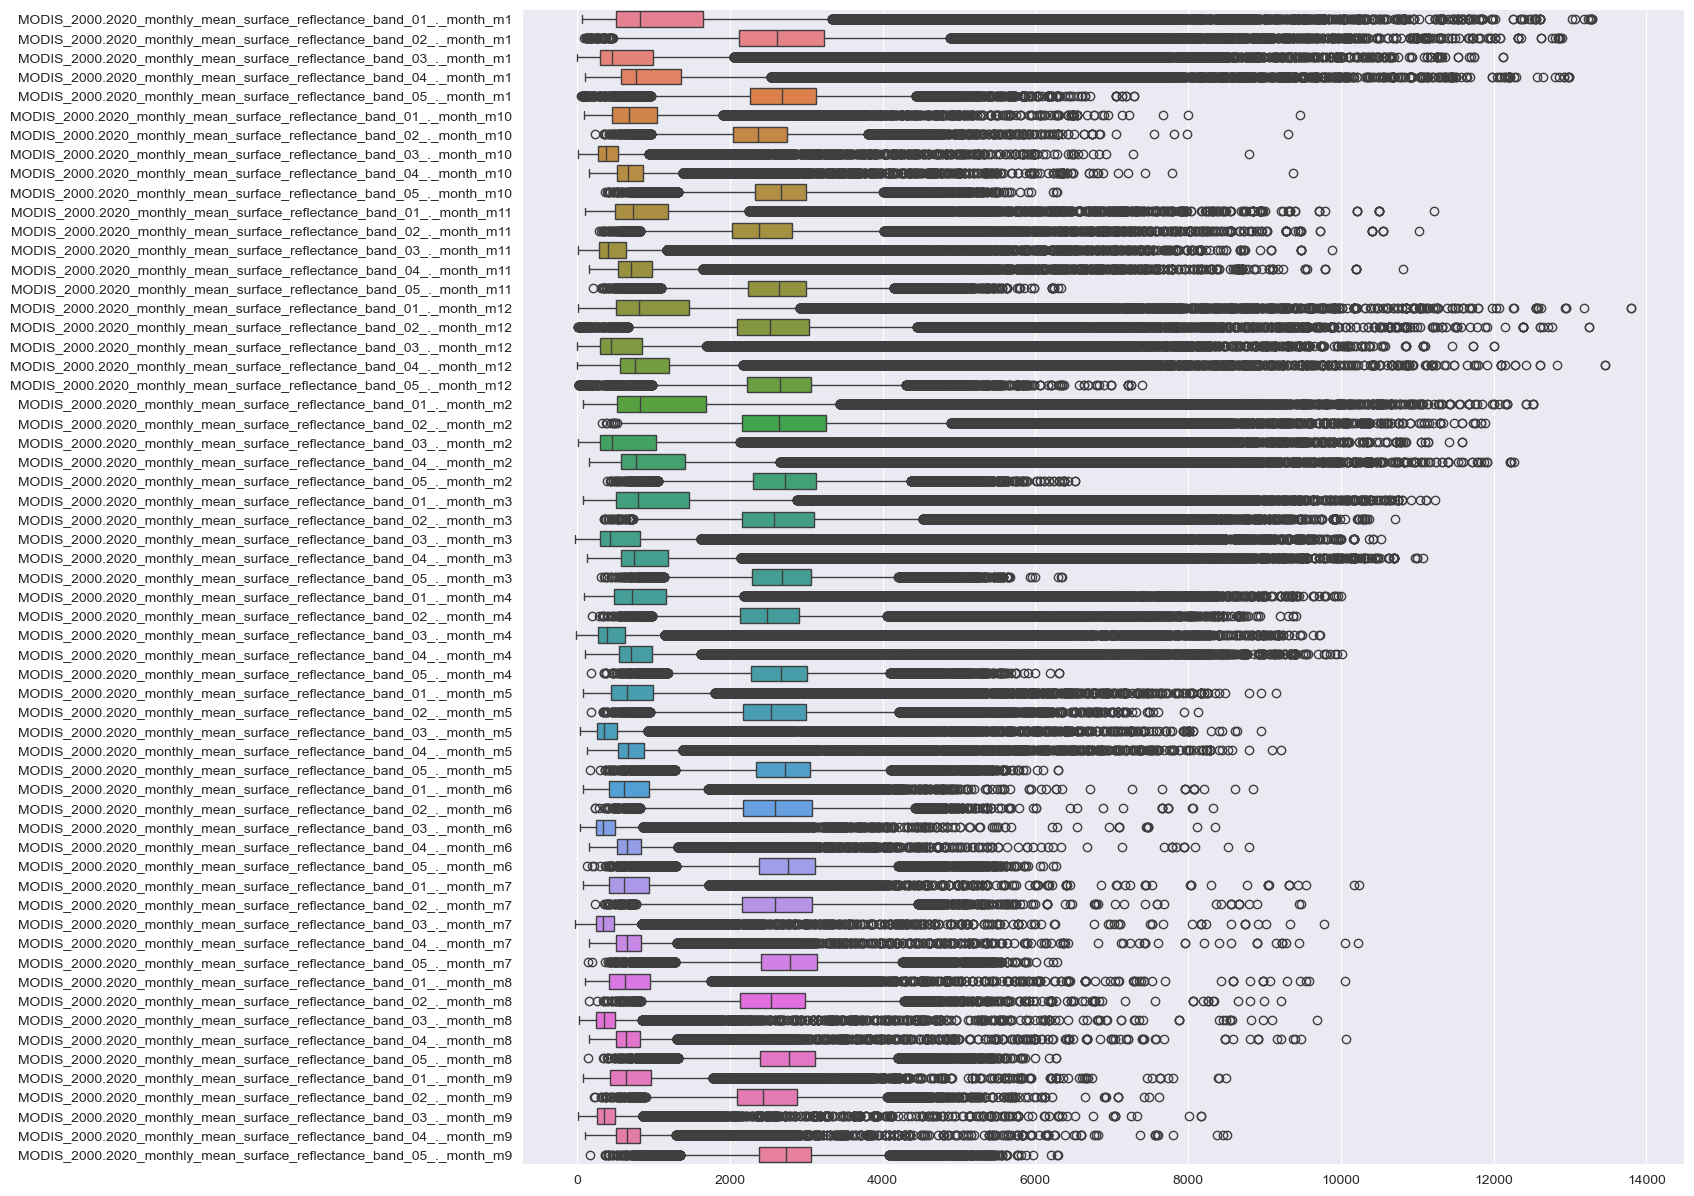

In [161]:
df_modis = df_modis_vod[[c for c in df_modis_vod.columns if c.startswith('MODIS_')]]

plt.figure(figsize=(15, 15))
sns.boxplot(data=df_modis, orient='h')
plt.show()


In [162]:
negative_mask = (df_modis < 0)
any_negatives = negative_mask.any().any()
print("Czy istnieją wartości ujemne w VOD?", any_negatives)
print(f"Wartość maksymalna dla kolumn VOD: {df_modis.max().max()}")
print(f"Wartość minimalna dla kolumn VOD: {df_modis.min().min()}")

Czy istnieją wartości ujemne w VOD? True
Wartość maksymalna dla kolumn VOD: 13804
Wartość minimalna dla kolumn VOD: -35


W tym przypadku, zgodnie z researchem, zdecydowałem się na usunięcie (zastąpienie ich wartościami NaN) wartości ujemnych, ponieważ:
1. W normalnych warunkach odbicie nie powinno być ujemne, ponieważ fizycznie oznaczałoby to, że powierzchnia emituje więcej energii, niż otrzymuje, co jest niemożliwe w typowych warunkach
2. Ujemne wartości w praktyce są często traktowane jako artefakty przetwarzania danych lub błędy pomiarowe
3. Ujemne wartości większe od -0.001 są nieistotne i mogą wynikać z błędów numerycznych

In [163]:
modis_cols = [c for c in df_modis_vod.columns if c.startswith('MODIS_')]
neg_mask = (df_modis_vod[modis_cols] < 0)

df_modis_vod[modis_cols] = df_modis_vod[modis_cols].mask(neg_mask, np.nan)


In [164]:
df_modis_vod.isnull().sum().sum()

8

In [165]:
df_modis = df_modis_vod[modis_cols]

negative_mask = (df_modis < 0)
any_negatives = negative_mask.any().any()

print("Czy istnieją wartości ujemne w VOD?", any_negatives)
print(f"Wartość maksymalna dla kolumn VOD: {df_modis.max().max()}")
print(f"Wartość minimalna dla kolumn VOD: {df_modis.min().min()}")

Czy istnieją wartości ujemne w VOD? False
Wartość maksymalna dla kolumn VOD: 13804.0
Wartość minimalna dla kolumn VOD: 1.0


Zastąpuje wartości NaN zerami - ujemne odbicie na 0

In [166]:
for col in modis_cols:
    df_modis_vod[col].fillna(0, inplace=True)  # Zamiana NaN na 0

C:\Users\Jacob\AppData\Local\Temp\ipykernel_5628\3121617241.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modis_vod[col].fillna(median_val, inplace=True)


# Heatmap korelacji MODIS

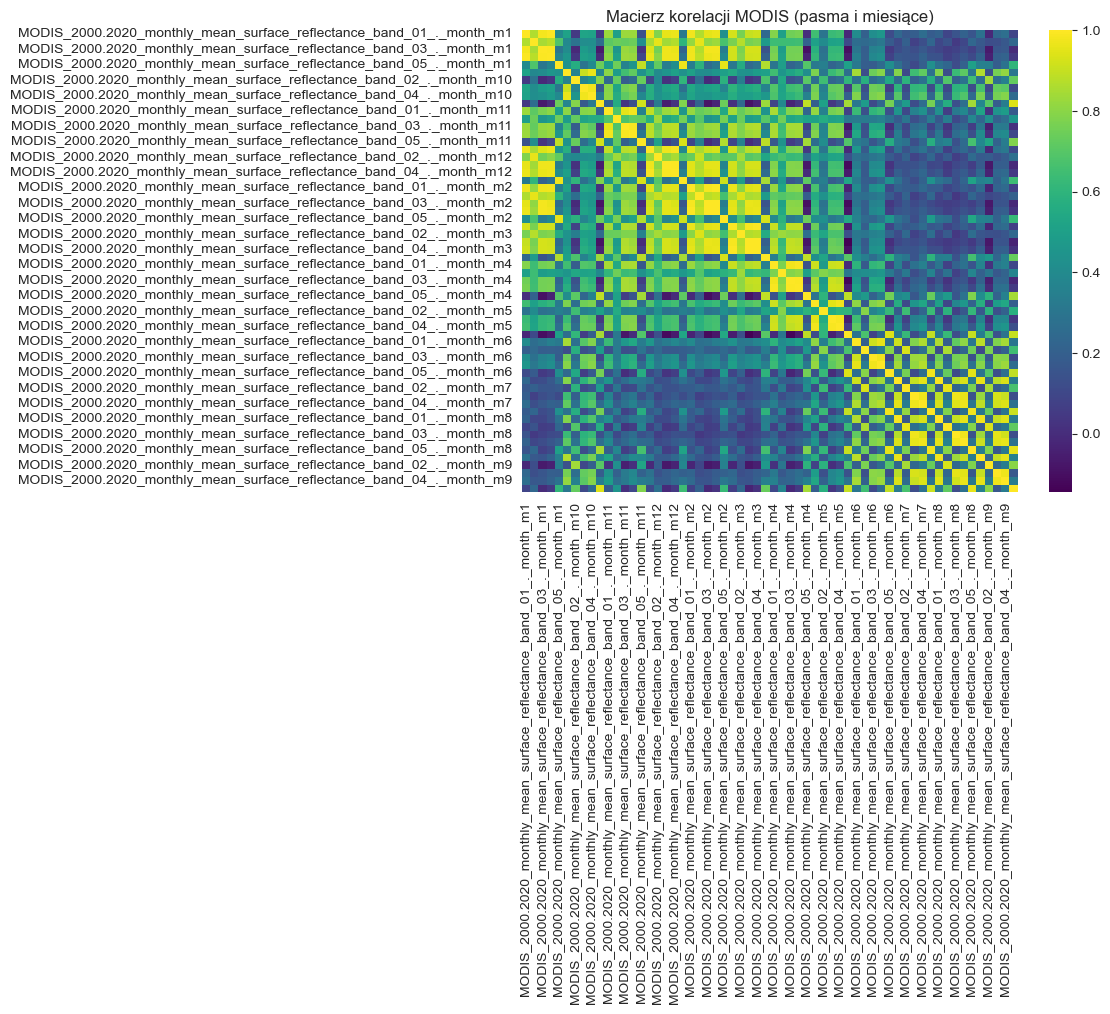

In [167]:
# Ponowne przypisanie z przekształconego df modis_vod
df_modis = df_modis_vod[modis_cols]

modis_corr = df_modis.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(modis_corr, cmap='viridis')
plt.title("Macierz korelacji MODIS (pasma i miesiące)")
plt.show()

Tu ewentualnie mogę wyciągnąć wnioski co do sezonowości oraz korelacji względem miesięcy zimowych/letnich. Np. m2 i m1, m2 i m12, natomiast m6 i m5 są mniej skorelowane, mniejsza wartość niż w przypadku zimowych miesięcy.

# Sumaryczna heatmapa korelacji MODIS I VOD

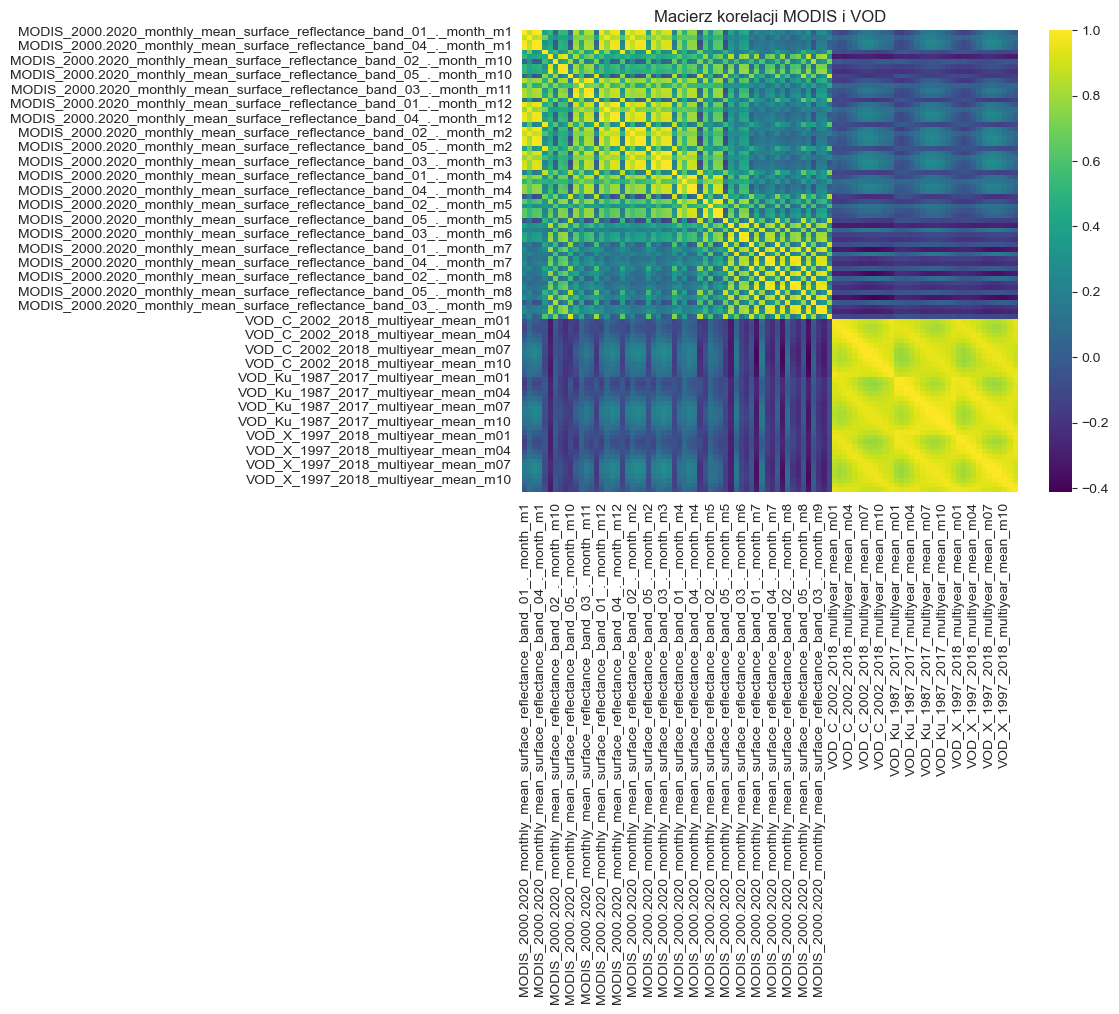

In [101]:
summary_corr = df_modis_vod.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(summary_corr, cmap='viridis')
plt.title("Macierz korelacji MODIS i VOD")
plt.show()

Z tej heatmapy wynika, że VOD i MODIS nie są jakoś mocno skorelowane.

# Dalsza analiza
1. To co można zrobić to sprawdzić korelację MODIS z VOD - jak się ma odbicie światła słoncznego do biomasy/zawartości wody
2. Jakaś transformacją/normalizacja np. logarytmiczna
3. Grupowanie np. po miesiącach zimowych/zimnych i cieplejszych/letnich
4. Jakiś feature engineering - np. cecha typu średnia po wszystkich miesiącach z VOD czy MODIS, albo jakaś amplituda, zależy co będzie pomocne
5. Korelacje mogą wskazywać, które cechy są redundantne, co może być istotne w kontekście przygotowania danych do modelowania (np. cechy o wysokiej korelacji można zastąpić jedną zmienną syntetyczną)

### Porównanie MODIS dla jednego miesiąca

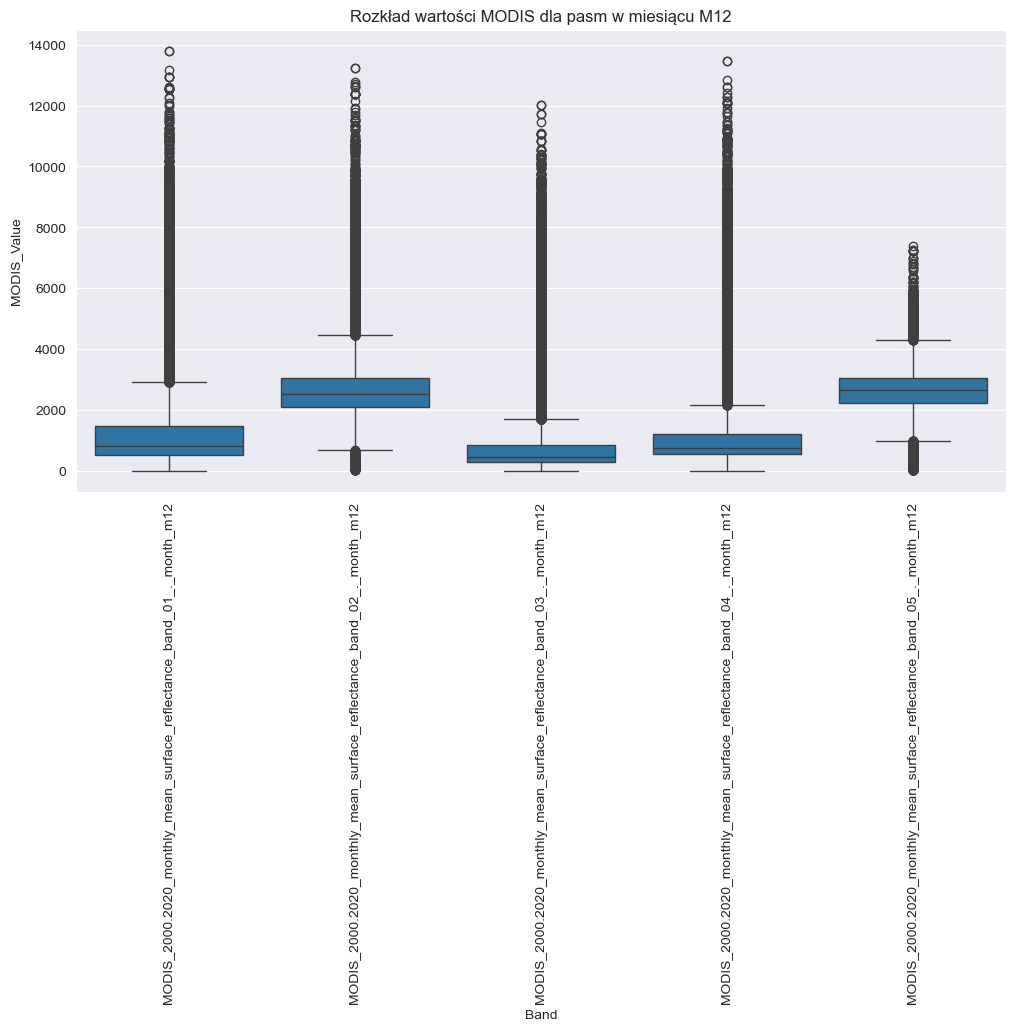

In [76]:
month = "m12"

# Wybierz kolumny dla tego miesiąca
modis_month_cols = [col for col in df_modis.columns if f"_{month}" in col]

# Tworzymy DataFrame tylko z danymi dla tego miesiąca
df_month = df_modis[modis_month_cols]


# # Konwersja do formatu long dla seaborn
df_long = df_month.melt(var_name="Band", value_name="MODIS_Value")

# Wizualizacja
plt.figure(figsize=(12, 6))
sns.boxplot(x="Band", y="MODIS_Value", data=df_long)
plt.xticks(rotation=90)
plt.title(f"Rozkład wartości MODIS dla pasm w miesiącu {month.upper()}")
plt.show()


### Porównanie wartości MODIS dla jednego pasma w różnych miesiącach

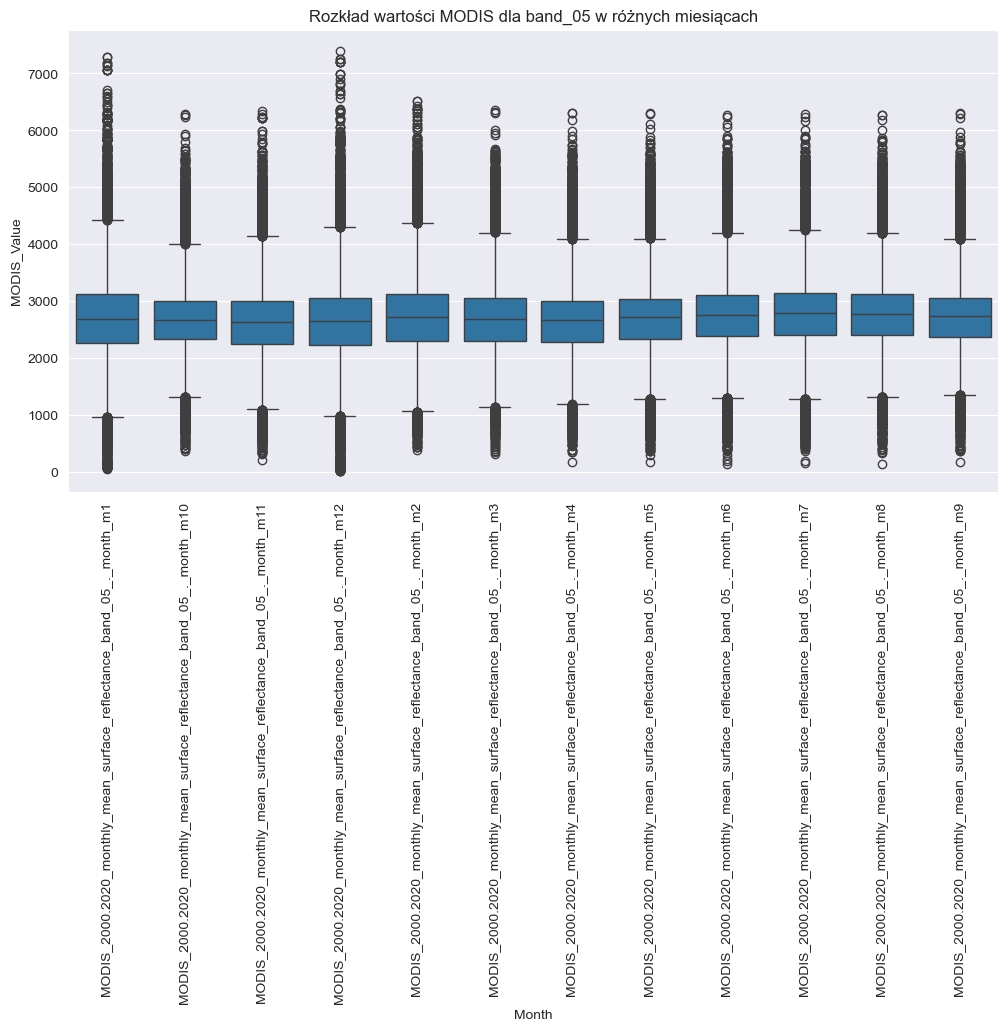

In [146]:
# Wybierz band do analizy
band = "band_05"

# Wybierz kolumny dla tego bandu
modis_band_cols = [col for col in df_modis.columns if band in col]

# Tworzymy DataFrame tylko dla tego bandu
df_band = df_modis[modis_band_cols]

# Konwersja do formatu long dla seaborn
df_long = df_band.melt(var_name="Month", value_name="MODIS_Value")

# Wizualizacja
plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="MODIS_Value", data=df_long)
plt.xticks(rotation=90)
plt.title(f"Rozkład wartości MODIS dla {band} w różnych miesiącach")
plt.show()


### Sprawdzanie wielu pasm dla MODIS na wykresie liniowym na przestrzeni miesięcy

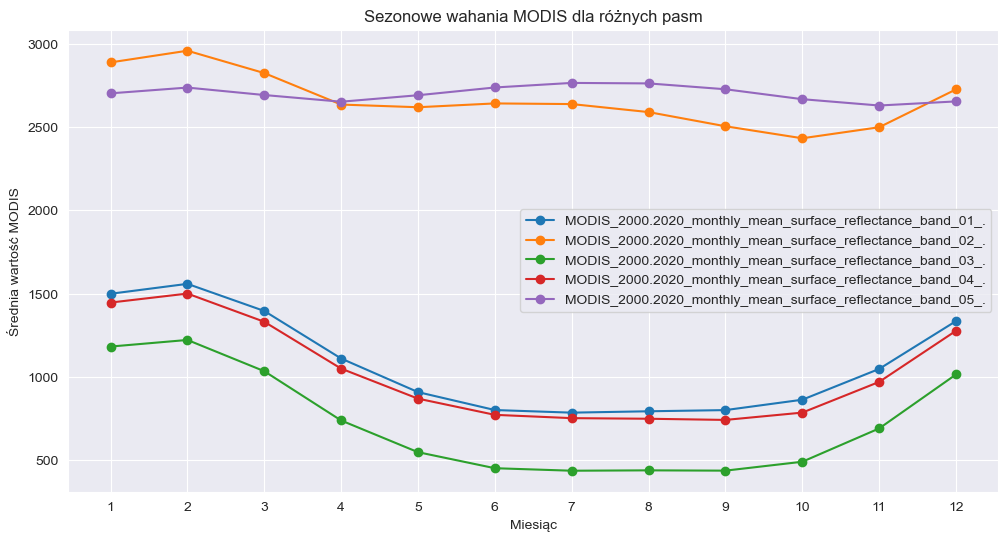

In [168]:
# Automatyczne wykrycie bandów MODIS
modis_bands = sorted(set([col.split("_month_")[0] for col in df_modis_vod.columns if "MODIS" in col]))

# Miesiące w formacie bez zer wiodących (dopasowane do Twojego formatu)
months = [f"m{i}" for i in range(1, 13)]

plt.figure(figsize=(12, 6))

for band in modis_bands:
    avg_month = []

    for m in months:
        # Tworzenie poprawnej nazwy kolumny dla danego bandu i miesiąca
        month_cols = [c for c in df_modis_vod.columns if band in c and f"_month_{m}" in c]

        if len(month_cols) == 0:
            avg_month.append(None)
            continue

        col_data = df_modis_vod[month_cols[0]]
        mean_val = col_data.mean(skipna=True)
        avg_month.append(mean_val)

    # Rysowanie wykresu dla danego bandu
    plt.plot(range(1, 13), avg_month, marker='o', label=band)

# Konfiguracja wykresu
plt.xticks(range(1, 13))  # miesiące na osi X
plt.xlabel("Miesiąc")
plt.ylabel("Średnia wartość MODIS")
plt.title("Sezonowe wahania MODIS dla różnych pasm")
plt.legend()
plt.show()


In [148]:
modis_bands = sorted(set([col.split("_month_")[0] for col in df_modis_vod.columns if "MODIS" in col]))

# Tworzymy pustą listę na DataFrame'y
df_modis_list = []

for band in modis_bands:
    # Pobieramy kolumny dla danego bandu
    band_cols = [c for c in df_modis_vod.columns if band in c]

    # Tworzymy tymczasowy DataFrame z wartościami dla tego bandu
    df_band = df_modis[band_cols]
    df_band_melt = df_band.melt(var_name="col_name", value_name="modis_value")

    # Ekstrakcja nazwy pasma (np. "band_01", "band_02")
    band_name = band.split("_")[-2] + "_" + band.split("_")[-1]  # Pobiera np. "band_01"
    df_band_melt["band"] = band_name  # Przypisujemy nazwę pasma

    df_modis_list.append(df_band_melt)

# Łączymy wszystkie DataFrame'y w jeden
df_modis_bands = pd.concat(df_modis_list, ignore_index=True)

# Wykres pudełkowy dla porównania rozkładów MODIS w różnych pasmach
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_modis_bands, x="band", y="modis_value")
plt.title("Porównanie rozkładów MODIS w różnych pasmach (wszystkie miesiące razem)")
plt.show()


KeyError: "None of [Index(['MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m1',\n       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m2',\n       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m3',\n       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m4',\n       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m5',\n       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m6',\n       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m7',\n       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m8',\n       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m9',\n       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m10',\n       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m11',\n       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_34_._month_m12'],\n      dtype='object')] are in the [columns]"

### Sprawdzenie korelacji między bandem01 i 04 dla wszystkich miesięcy

            band_01_1  band_01_2  band_01_3  band_01_4  band_01_5  band_01_6  \
band_01_1    1.000000   0.514590   0.829777   0.972164   0.977252   0.926461   
band_01_2    0.514590   1.000000   0.803145   0.571796   0.510175   0.544357   
band_01_3    0.829777   0.803145   1.000000   0.889660   0.819115   0.844469   
band_01_4    0.972164   0.571796   0.889660   1.000000   0.946385   0.916766   
band_01_5    0.977252   0.510175   0.819115   0.946385   1.000000   0.964633   
band_01_6    0.926461   0.544357   0.844469   0.916766   0.964633   1.000000   
band_01_7    0.787396   0.647895   0.849910   0.813158   0.821779   0.905809   
band_01_8    0.646924   0.775524   0.814980   0.691433   0.665701   0.744326   
band_01_9    0.409664   0.846247   0.633015   0.460295   0.397157   0.439819   
band_01_10   0.239069   0.785805   0.453293   0.280842   0.214951   0.230835   
band_01_11   0.211342   0.782263   0.427142   0.253490   0.184083   0.192976   
band_01_12   0.281093   0.862756   0.520

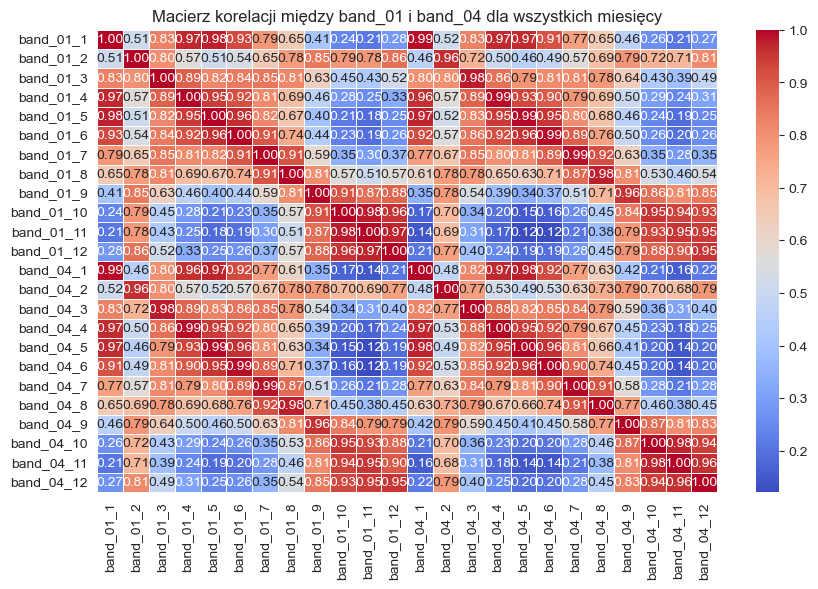

In [169]:
# Pobieramy kolumny dla band_01 i band_04 (wszystkie miesiące)
band_01_cols = [col for col in df_modis.columns if "band_01" in col]
band_04_cols = [col for col in df_modis.columns if "band_04" in col]

# Sprawdzamy, czy mamy tyle samo miesięcy w obu bandach
band_01_cols.sort()
band_04_cols.sort()

# Tworzymy DataFrame tylko z danymi tych dwóch bandów
df_band_01_04 = df_modis[band_01_cols].copy()
df_band_01_04.columns = [f"band_01_{i+1}" for i in range(len(band_01_cols))]  # Nazwy kolumn dla band_01
df_band_01_04 = df_band_01_04.join(df_modis[band_04_cols].set_axis([f"band_04_{i+1}" for i in range(len(band_04_cols))], axis=1))

# Obliczamy macierz korelacji
corr_matrix = df_band_01_04.corr()

print(corr_matrix)

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Macierz korelacji między band_01 i band_04 dla wszystkich miesięcy")
plt.show()


Widać silne powiązanie dwóch tych dwóch pasm więc należy je scalić i uśrednić

In [170]:
# Lista miesięcy w formacie zgodnym z Twoimi danymi (m1, m2, ..., m12)
months = [f"m{i}" for i in range(1, 13)]

# Iterujemy po miesiącach i scalanie band_03 i band_04
for month in months:
    # Znajdujemy kolumny dla danego miesiąca
    band_01_col = next((col for col in df_modis_vod.columns if "band_01" in col and f"_month_{month}" in col), None)
    band_04_col = next((col for col in df_modis_vod.columns if "band_04" in col and f"_month_{month}" in col), None)

    # Sprawdzamy, czy obie kolumny istnieją
    if band_01_col and band_04_col:
        # Tworzymy nową kolumnę jako średnią band_03 i band_04
        df_modis_vod[f"MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_{month}"] = df_modis_vod[[band_01_col, band_04_col]].mean(axis=1)

        # Opcjonalnie: usunięcie oryginalnych kolumn
        df_modis_vod.drop(columns=[band_01_col, band_04_col], inplace=True)

# Podgląd DataFrame po scaleniu
df_modis_vod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55489 entries, 0 to 55488
Data columns (total 84 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1   55489 non-null  int64  
 1   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1   55489 non-null  int64  
 2   MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1   55489 non-null  int64  
 3   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10  55489 non-null  int64  
 4   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10  55489 non-null  int64  
 5   MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m10  55489 non-null  int64  
 6   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11  55489 non-null  int64  


### Wykres liniowy po scaleniu band01 i band04

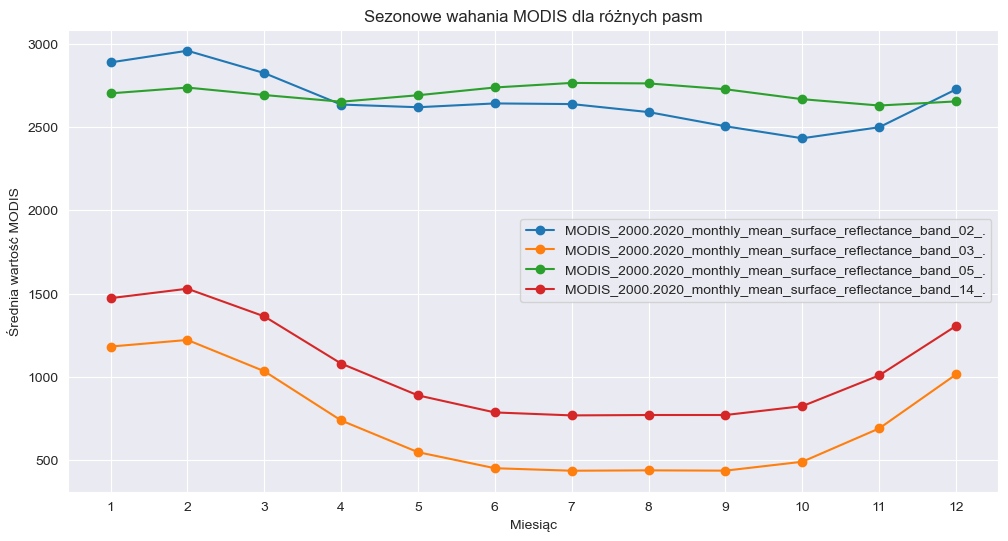

In [171]:
# Automatyczne wykrycie bandów MODIS
modis_bands = sorted(set([col.split("_month_")[0] for col in df_modis_vod.columns if "MODIS" in col]))

# Miesiące w formacie bez zer wiodących (dopasowane do Twojego formatu)
months = [f"m{i}" for i in range(1, 13)]

plt.figure(figsize=(12, 6))

for band in modis_bands:
    avg_month = []

    for m in months:
        # Tworzenie poprawnej nazwy kolumny dla danego bandu i miesiąca
        month_cols = [c for c in df_modis_vod.columns if band in c and f"_month_{m}" in c]

        if len(month_cols) == 0:
            avg_month.append(None)
            continue

        col_data = df_modis_vod[month_cols[0]]
        mean_val = col_data.mean(skipna=True)
        avg_month.append(mean_val)

    # Rysowanie wykresu dla danego bandu
    plt.plot(range(1, 13), avg_month, marker='o', label=band)

# Konfiguracja wykresu
plt.xticks(range(1, 13))  # miesiące na osi X
plt.xlabel("Miesiąc")
plt.ylabel("Średnia wartość MODIS")
plt.title("Sezonowe wahania MODIS dla różnych pasm")
plt.legend()
plt.show()

### Scalanie kolumn VOD_C z VOD_X

In [101]:
months = [f"m{str(i).zfill(2)}" for i in range(1, 13)]

for month in months:
    vod_c_col = next((col for col in df_modis_vod.columns if f"VOD_C" in col and month in col), None)
    vod_x_col = next((col for col in df_modis_vod.columns if f"VOD_X" in col and month in col), None)

    if vod_c_col and vod_x_col:
        # Tworzymy nową kolumnę VOD_CX_mXX jako średnią VOD_C i VOD_X
        df_modis_vod[f"VOD_CX_{month}"] = df_modis_vod[[vod_c_col, vod_x_col]].mean(axis=1)

        # Opcjonalnie: usuń stare kolumny VOD_C i VOD_X
        df_modis_vod.drop(columns=[vod_c_col, vod_x_col], inplace=True)

# Podgląd DataFrame po scaleniu
df_modis_vod.head()

MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1  \
0                                                543                     
1                                                837                     
2                                                953                     
3                                                565                     
4                                               3137                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1  \
0                                                943                     
1                                                920                     
2                                               3236                     
3                                               3225                     
4                                               3253                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1  \
0                                                429                     
1                                                527                     
2                                                519                     
3                                                296                     
4                                               3727                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1  \
0                                                568                     
1                                                710                     
2                                                885                     
3                                                661                     
4                                               3386                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1  \
0                                               1199                     
1                                                977                     
2                                               3682                     
3                                               3379                     
4                                               2286                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m10  \
0                                                657                      
1                                               1111                      
2                                                501                      
3                                                617                      
4                                                838                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10  \
0                                               1088                      
1                                               1218                      
2                                               4240                      
3                                               2934                      
4                                               1678                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10  \
0                                                438                      
1                                                708                      
2                                                294                      
3                                                321                      
4                                                598                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m10  \
0                                                618                      
1                                                941                      
2                                                736                      
3                                                648                      
4                                                7

### Zwężenie zakresów do pór roku

In [102]:
seasons = {
    "Winter": ["m12", "m01", "m02"],
    "Spring": ["m03", "m04", "m05"],
    "Summer": ["m06", "m07", "m08"],
    "Autumn": ["m09", "m10", "m11"]
}

# Iterujemy po VOD_CX i VOD_Ku
for season, months in seasons.items():
    df_modis_vod[f"VOD_CX_{season}"] = df_modis_vod[[f"VOD_CX_{m}" for m in months]].mean(axis=1)
    df_modis_vod[f"VOD_Ku_{season}"] = df_modis_vod[[f"VOD_Ku_1987_2017_multiyear_mean_{m}" for m in months]].mean(axis=1)

# Opcjonalnie: usunięcie starych miesięcznych kolumn
df_modis_vod.drop(columns=[col for col in df_modis_vod.columns if any(m in col for m in sum(seasons.values(), []))], inplace=True)

# Podgląd DataFrame po przekształceniu
df_modis_vod.head()


MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1  \
0                                                543                     
1                                                837                     
2                                                953                     
3                                                565                     
4                                               3137                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1  \
0                                                943                     
1                                                920                     
2                                               3236                     
3                                               3225                     
4                                               3253                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1  \
0                                                429                     
1                                                527                     
2                                                519                     
3                                                296                     
4                                               3727                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1  \
0                                                568                     
1                                                710                     
2                                                885                     
3                                                661                     
4                                               3386                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1  \
0                                               1199                     
1                                                977                     
2                                               3682                     
3                                               3379                     
4                                               2286                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m2  \
0                                                532                     
1                                                954                     
2                                                917                     
3                                                512                     
4                                               3499                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m2  \
0                                                978                     
1                                               1056                     
2                                               3022                     
3                                               3194                     
4                                               3787                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m2  \
0                                                409                     
1                                                605                     
2                                                482                     
3                                                273                     
4                                               3829                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m2  \
0                                                559                     
1                                                808                     
2                                                851                     
3                                                627                     
4                                               3631                     

### Wizualizacja

C:\Users\Jacob\AppData\Local\Temp\ipykernel_5628\2107674716.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_means.index, y=seasonal_means.values, palette="viridis")


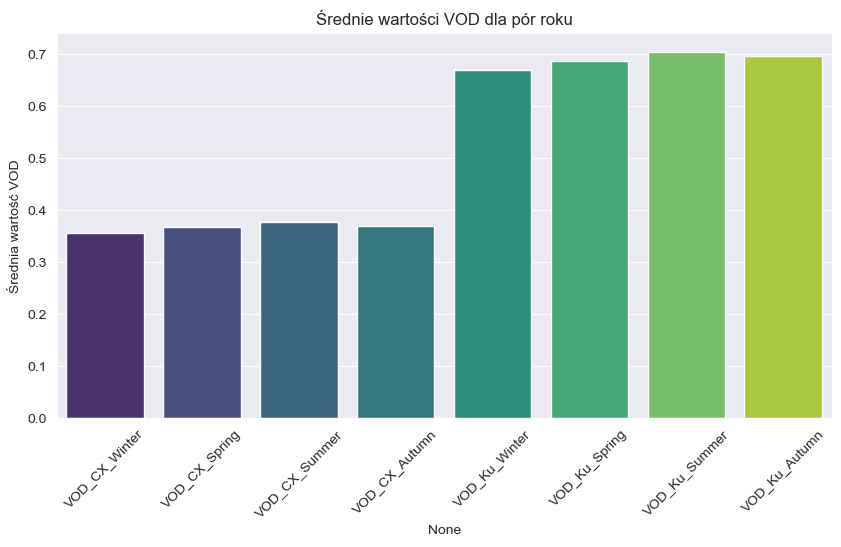

In [103]:
# Tworzymy DataFrame dla wizualizacji
seasonal_means = df_modis_vod[["VOD_CX_Winter", "VOD_CX_Spring", "VOD_CX_Summer", "VOD_CX_Autumn",
                      "VOD_Ku_Winter", "VOD_Ku_Spring", "VOD_Ku_Summer", "VOD_Ku_Autumn"]].mean()

# Wykres
plt.figure(figsize=(10, 5))
sns.barplot(x=seasonal_means.index, y=seasonal_means.values, palette="viridis")
plt.title("Średnie wartości VOD dla pór roku")
plt.ylabel("Średnia wartość VOD")
plt.xticks(rotation=45)
plt.show()

### Wykres liniowy tym razem dla pór roku i dwóch pasm VOD

[0.6692450554318482, 0.6880521693956126, 0.705631483911618, 0.696730451068615]


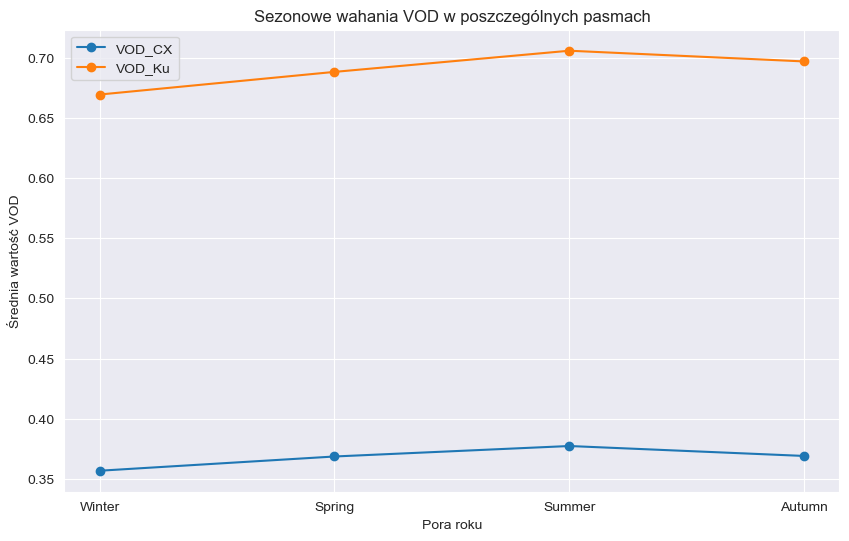

In [106]:
bands = ["VOD_CX", "VOD_Ku"]
seasons = ["Winter", "Spring", "Summer", "Autumn"]

plt.figure(figsize=(10, 6))

for band in bands:
    avg_season = []

    for s in seasons:
        season_cols = [c for c in df_modis_vod.columns if band in c and s in c]

        if len(season_cols) == 0:
            avg_season.append(None)
            continue

        col_data = df_modis_vod[season_cols[0]]
        mean_val = col_data.mean(skipna=True)
        avg_season.append(mean_val)

    plt.plot(seasons, avg_season, marker='o', label=band)

print(avg_season)
plt.xticks(seasons)  # miesiące na osi X
plt.xlabel("Pora roku")
plt.ylabel("Średnia wartość VOD")
plt.title("Sezonowe wahania VOD w poszczególnych pasmach")
plt.legend()
plt.show()

## Standaryzacja VOD

In [174]:
# Skalowanie VOD - MinMaxScaler (0-1)
vod_cols = [col for col in df_modis_vod.columns if "VOD" in col]
scaler_vod = MinMaxScaler()
df_modis_vod[vod_cols] = scaler_vod.fit_transform(df_modis_vod[vod_cols])

## Standaryzacja MODIS

In [179]:
# Skalowanie MODIS - Log Transform (log(x + 1))
modis_cols = [col for col in df_modis_vod.columns if "MODIS" in col]
df_modis_vod[modis_cols] = np.log1p(df_modis_vod[modis_cols])  # log(x + 1) unikamy problemu log(0)


In [177]:
df_modis_vod.head()

MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1  \
0                                           6.850126                     
1                                           6.825460                     
2                                           8.082402                     
3                                           8.078998                     
4                                           8.087640                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1  \
0                                           6.063785                     
1                                           6.269096                     
2                                           6.253829                     
3                                           5.693732                     
4                                           8.223627                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1  \
0                                           7.090077                     
1                                           6.885510                     
2                                           8.211483                     
3                                           8.125631                     
4                                           7.734996                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10  \
0                                           6.993015                      
1                                           7.105786                      
2                                           8.352554                      
3                                           7.984463                      
4                                           7.425954                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10  \
0                                           6.084499                      
1                                           6.563856                      
2                                           5.686975                      
3                                           5.774552                      
4                                           6.395262                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m10  \
0                                           7.296413                      
1                                           7.140453                      
2                                           8.210124                      
3                                           8.101678                      
4                                           7.587817                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11  \
0                                           6.910751                      
1                                           6.985642                      
2                                           8.290042                      
3                                           8.032360                      
4                                           7.844241                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m11  \
0                                           5.961005                      
1                                           6.432940                      
2                                           5.918894                      
3                                           5.755742                      
4                                           7.809947                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m11  \
0                                           7.210080                      
1                                           7.034388                      
2                                           8.195610                      
3                                           8.116118                      
4                                     

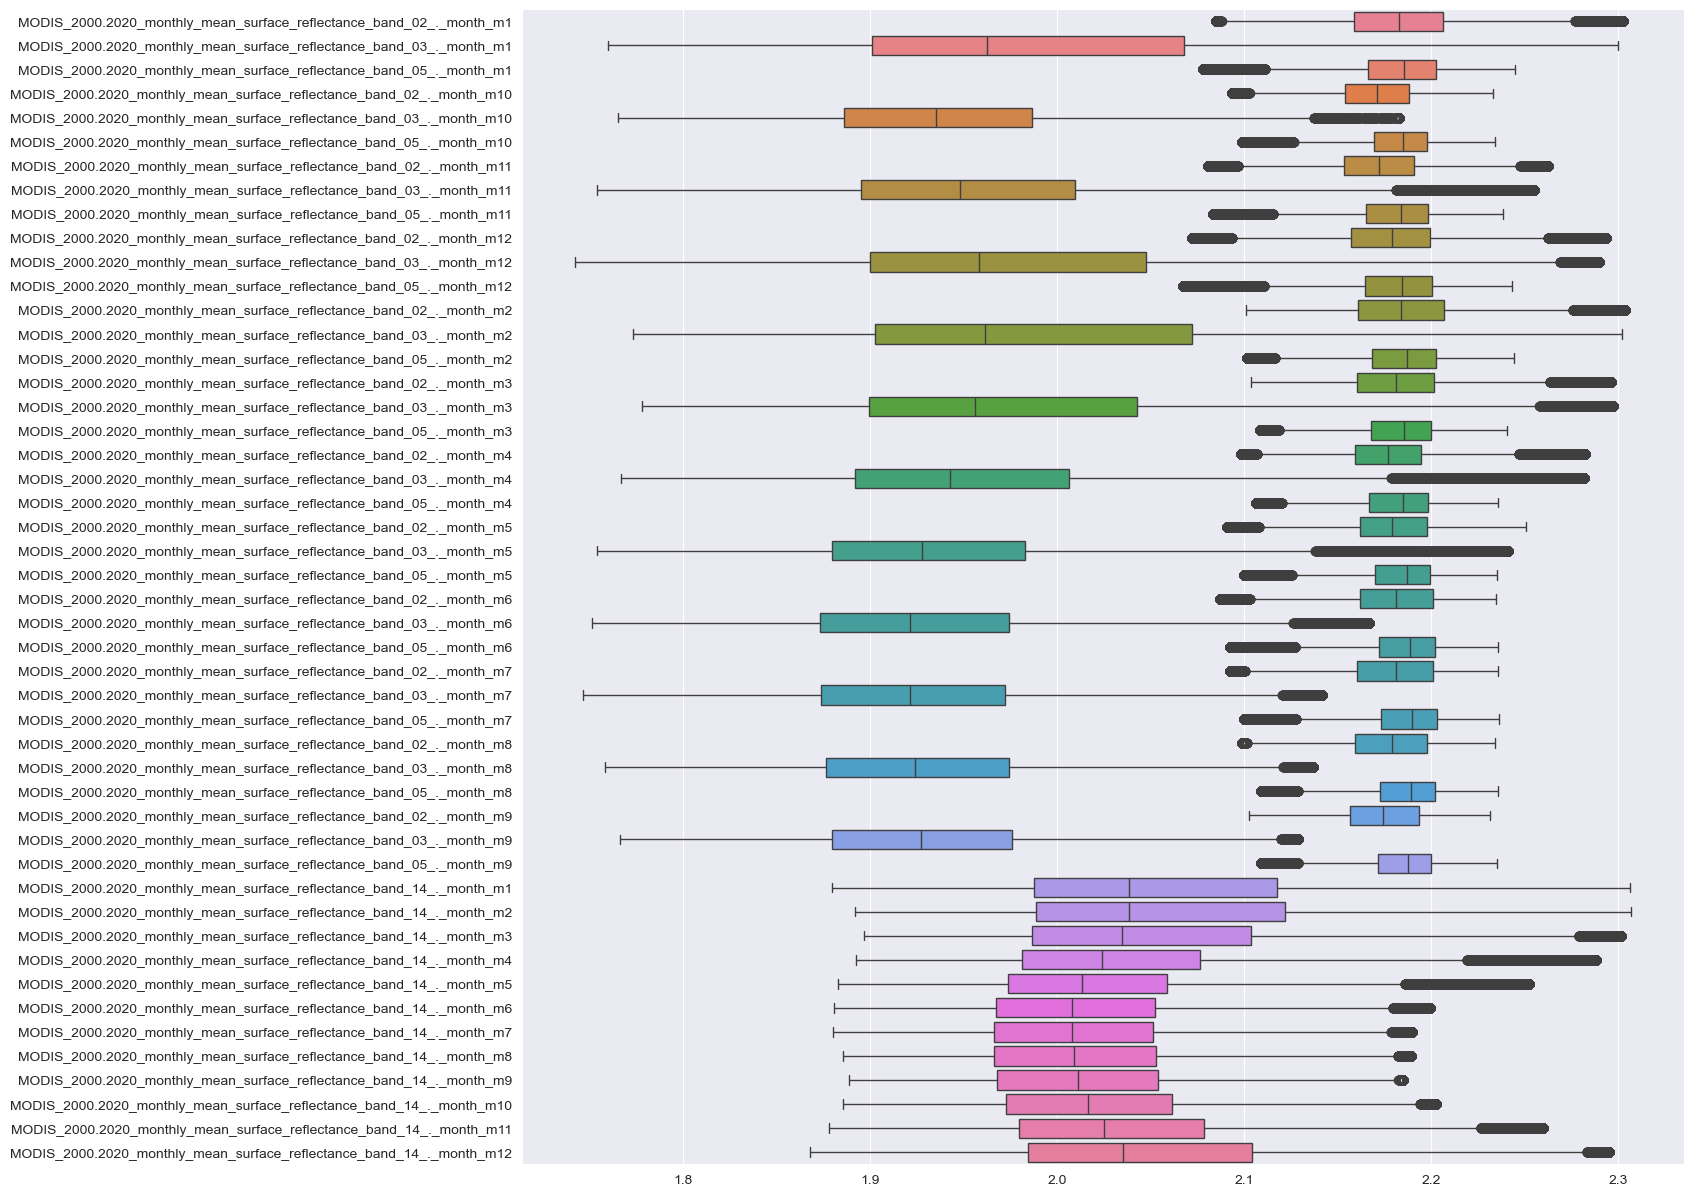

In [184]:
df_modis = df_modis_vod[[c for c in df_modis_vod.columns if c.startswith('MODIS_')]]

plt.figure(figsize=(15, 15))
sns.boxplot(data=df_modis, orient='h')
plt.show()

In [182]:
print(df_modis_vod[modis_cols].describe(percentiles=[0.01, 0.05, 0.95]))


       MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1  \
count                                       55489.000000                     
mean                                            2.184416                     
std                                             0.042359                     
min                                             1.696413                     
1%                                              2.085039                     
5%                                              2.126546                     
50%                                             2.182650                     
95%                                             2.262800                     
max                                             2.348042                     

       MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1  \
count                                       55489.000000                     
mean                                            1.995351       

In [183]:
for col in modis_cols:
    upper_limit = df_modis_vod[col].quantile(0.99)  # 99 percentyl
    lower_limit = df_modis_vod[col].quantile(0.01)  # 1 percentyl
    df_modis_vod[col] = df_modis_vod[col].clip(lower=lower_limit, upper=upper_limit)


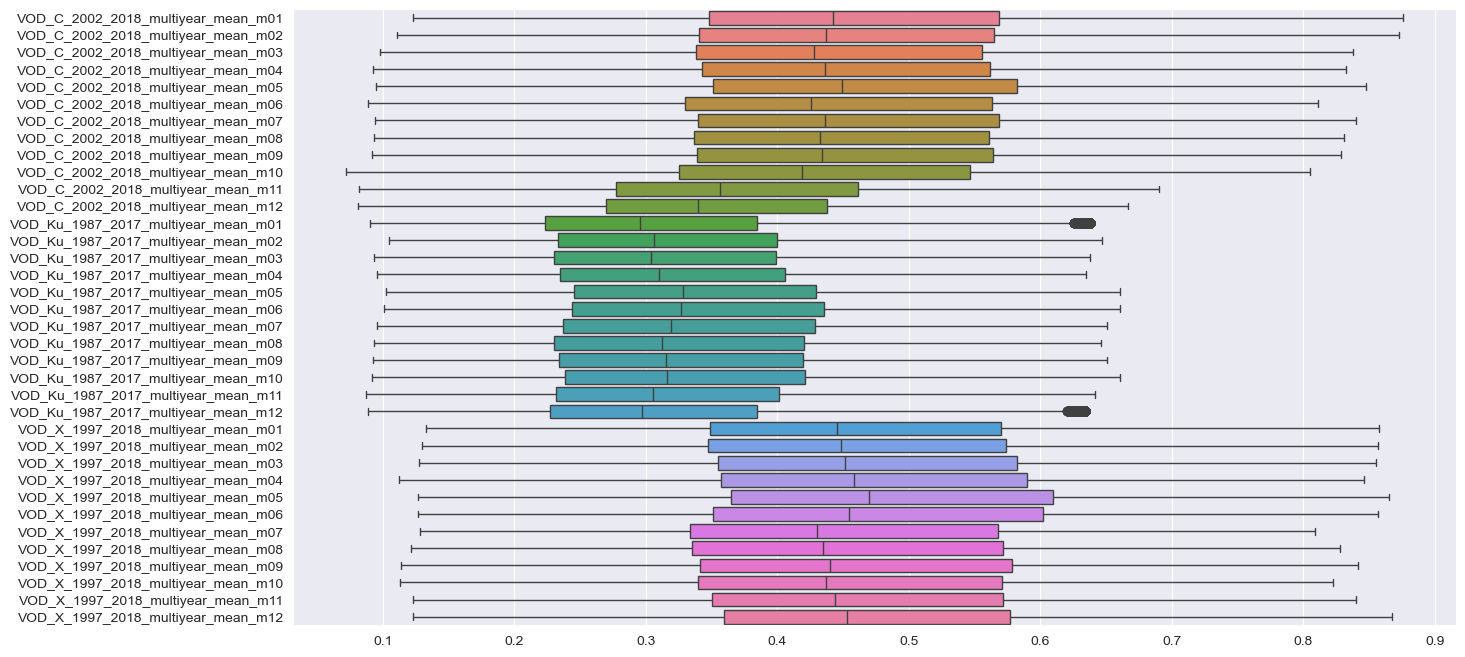

In [189]:
df_vod = df_modis_vod[[c for c in df_modis_vod.columns if c.startswith('VOD_')]]
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_vod, orient='h')
plt.show()

In [188]:
for col in vod_cols:
    upper_limit = df_modis_vod[col].quantile(0.99)  # 99 percentyl
    lower_limit = df_modis_vod[col].quantile(0.01)  # 1 percentyl
    df_modis_vod[col] = df_modis_vod[col].clip(lower=lower_limit, upper=upper_limit)